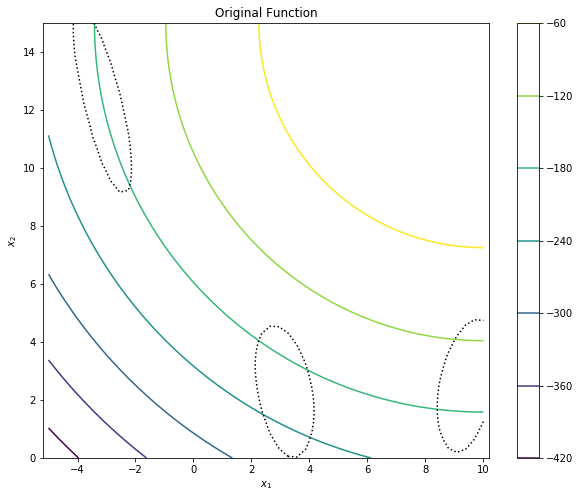

In [2]:
from numpy.random import uniform, seed
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
from scipy.interpolate import Rbf

# -- define problem: NEWBRANIN

def obj(x):
    f = -(x[0]-10.0)**2 - (x[1]-15.0)**2
    return f

def cns(x):
    a = 1.0
    b = 5.1/(4.0*(np.pi**2))
    c = 5.0/np.pi
    d = 6.0
    e = 10.0
    f = 1.0/(8.0*np.pi)
    branin = a*(x[1] - b*x[0]**2 + c*x[0] - d)**2 + e*(1-f)*np.cos(x[0]) + e
    g = branin - 5.0
    return g

lb = [-5, 0]
ub = [10, 15]

# -- plot original function

num = 50
x1, x2 = np.linspace(lb[0], ub[0], num), np.linspace(lb[1], ub[1], num)
x1_plot, x2_plot = np.meshgrid(x1, x2)
xs = np.hstack((x1_plot.reshape(-1,1), x2_plot.reshape(-1,1)))

fs, gs = [obj(x) for x in xs], [cns(x) for x in xs]
f_plot = np.array(fs).reshape(num, num)
g_plot = np.array(gs).reshape(num, num)

plt.figure(1, figsize=(10, 8))
plt.contour(x1_plot, x2_plot, f_plot) ; # plt.pcolormesh(x1_plot, x2_plot, f_plot)
plt.colorbar()
plt.contour(x1_plot, x2_plot, g_plot, colors="k", levels=0, linestyles='dotted')
plt.title('Original Function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis( [ lb[0], ub[0], lb[1], ub[1] ] )
plt.axis('equal')

plt.show()

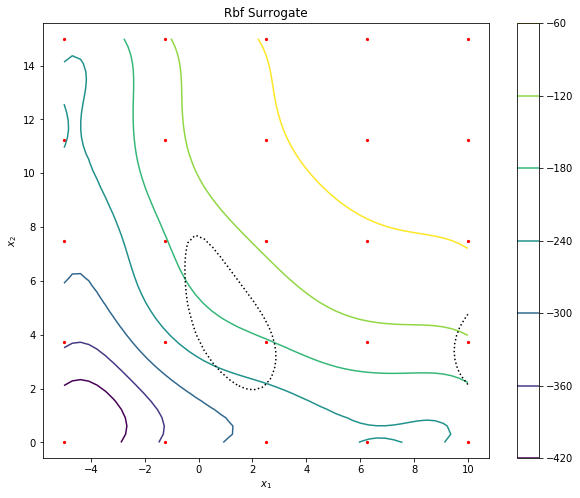

In [3]:
# -- plot Rbf surrogate

# ---- create samples

num = 5
x1, x2 = np.linspace(lb[0], ub[0], num), np.linspace(lb[1], ub[1], num)
x1s, x2s = np.meshgrid(x1, x2)

xs = np.hstack((x1s.reshape(-1,1), x2s.reshape(-1,1)))
fs = [obj(x) for x in xs]
gs = [cns(x) for x in xs]

# ---- construct surrogate

rbf_f = Rbf(xs[:,0], xs[:,1], fs, function='gaussian')
rbf_g = Rbf(xs[:,0], xs[:,1], gs, function='gaussian')

# ---- plot

num = 50
x1, x2 = np.linspace(lb[0], ub[0], num), np.linspace(lb[1], ub[1], num)
x1_plot, x2_plot = np.meshgrid(x1, x2)
xs_plot = np.hstack((x1_plot.reshape(-1,1), x2_plot.reshape(-1,1)))

fhats, ghats = [rbf_f(*x) for x in xs_plot], [rbf_g(*x) for x in xs_plot]
fhat_plot = np.array(fhats).reshape(num, num)
ghat_plot = np.array(ghats).reshape(num, num)

plt.figure(2, figsize=(10, 8))
plt.contour(x1_plot, x2_plot, fhat_plot) ; # plt.pcolormesh(x1_plot, x2_plot, f_plot)
plt.colorbar()
plt.contour(x1_plot, x2_plot, ghat_plot, colors="k", levels=0, linestyles='dotted')
plt.scatter(xs[:,0], xs[:,1], s=5, c='r', marker='o')
plt.title('Rbf Surrogate')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis( [ lb[0], ub[0], lb[1], ub[1] ] )
plt.axis('equal')

plt.show()